# Sleep Health and Lifestyle

Author: Xidan Liao

Course Project, UC Irvine, Math 10, F23

# Introduction

## Project

This project attempts to analyze and predict people's sleep status through their daily habits and lifestyles. The variables include "Quality of Sleep", "Physical Activity Level", "Stress Level" and so on. Our main topics include the length of sleep and the presence of sleep disorders.

## Dataset Columns

- `Person ID`: An identifier for each individual.
- `Gender:` The gender of the person (Male/Female).
- `Age`: The age of the person in years.
- `Occupation`: The occupation or profession of the person.
- `Sleep Duration (hours)`: The number of hours the person sleeps per day.
- `Quality of Sleep (scale: 1-10)`: A subjective rating of the quality of sleep, ranging from 1 to 10.
- `Physical Activity Level (minutes/day)`: The number of minutes the person engages in physical activity daily.
- `Stress Level (scale: 1-10`): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- `BMI Category`: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- `Blood Pressure (systolic/diastolic)`: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- `Heart Rate (bpm)`: The resting heart rate of the person in beats per minute.
- `Daily Steps`: The number of steps the person takes per day.
- `Sleep Disorder`: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

**Details about Sleep Disorder Column:**

- `None`: The individual does not exhibit any specific sleep disorder.
- `Insomnia`: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- `Sleep Apnea`: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

# Dataset preprocessing

## Importing Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.shape

(374, 13)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Checking for missing values

In [ ]:
missing_values = df.isnull().sum()
missing_values

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

There is no missing value.

## Converting to category type

In [ ]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
df['Gender_cat'] = df['Gender'].astype('category').cat.codes
df['Occupation_cat'] = df['Occupation'].astype('category').cat.codes
df['BMI Category_cat'] = df['BMI Category'].astype('category').cat.codes
df['Sleep Disorder_cat'] = df['Sleep Disorder'].astype('category').cat.codes

df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_cat,Occupation_cat,BMI Category_cat,Sleep Disorder_cat
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,1,9,3,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1,1,0,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1,1,0,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,6,2,2
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,5,3,2
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,5,3,2
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,5,3,2
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,5,3,2


# Q1: Prediction of Sleep Duration

## Visualization

This visualization of pairplot provides a comprehensive overview of the relationships and distributions among these features.

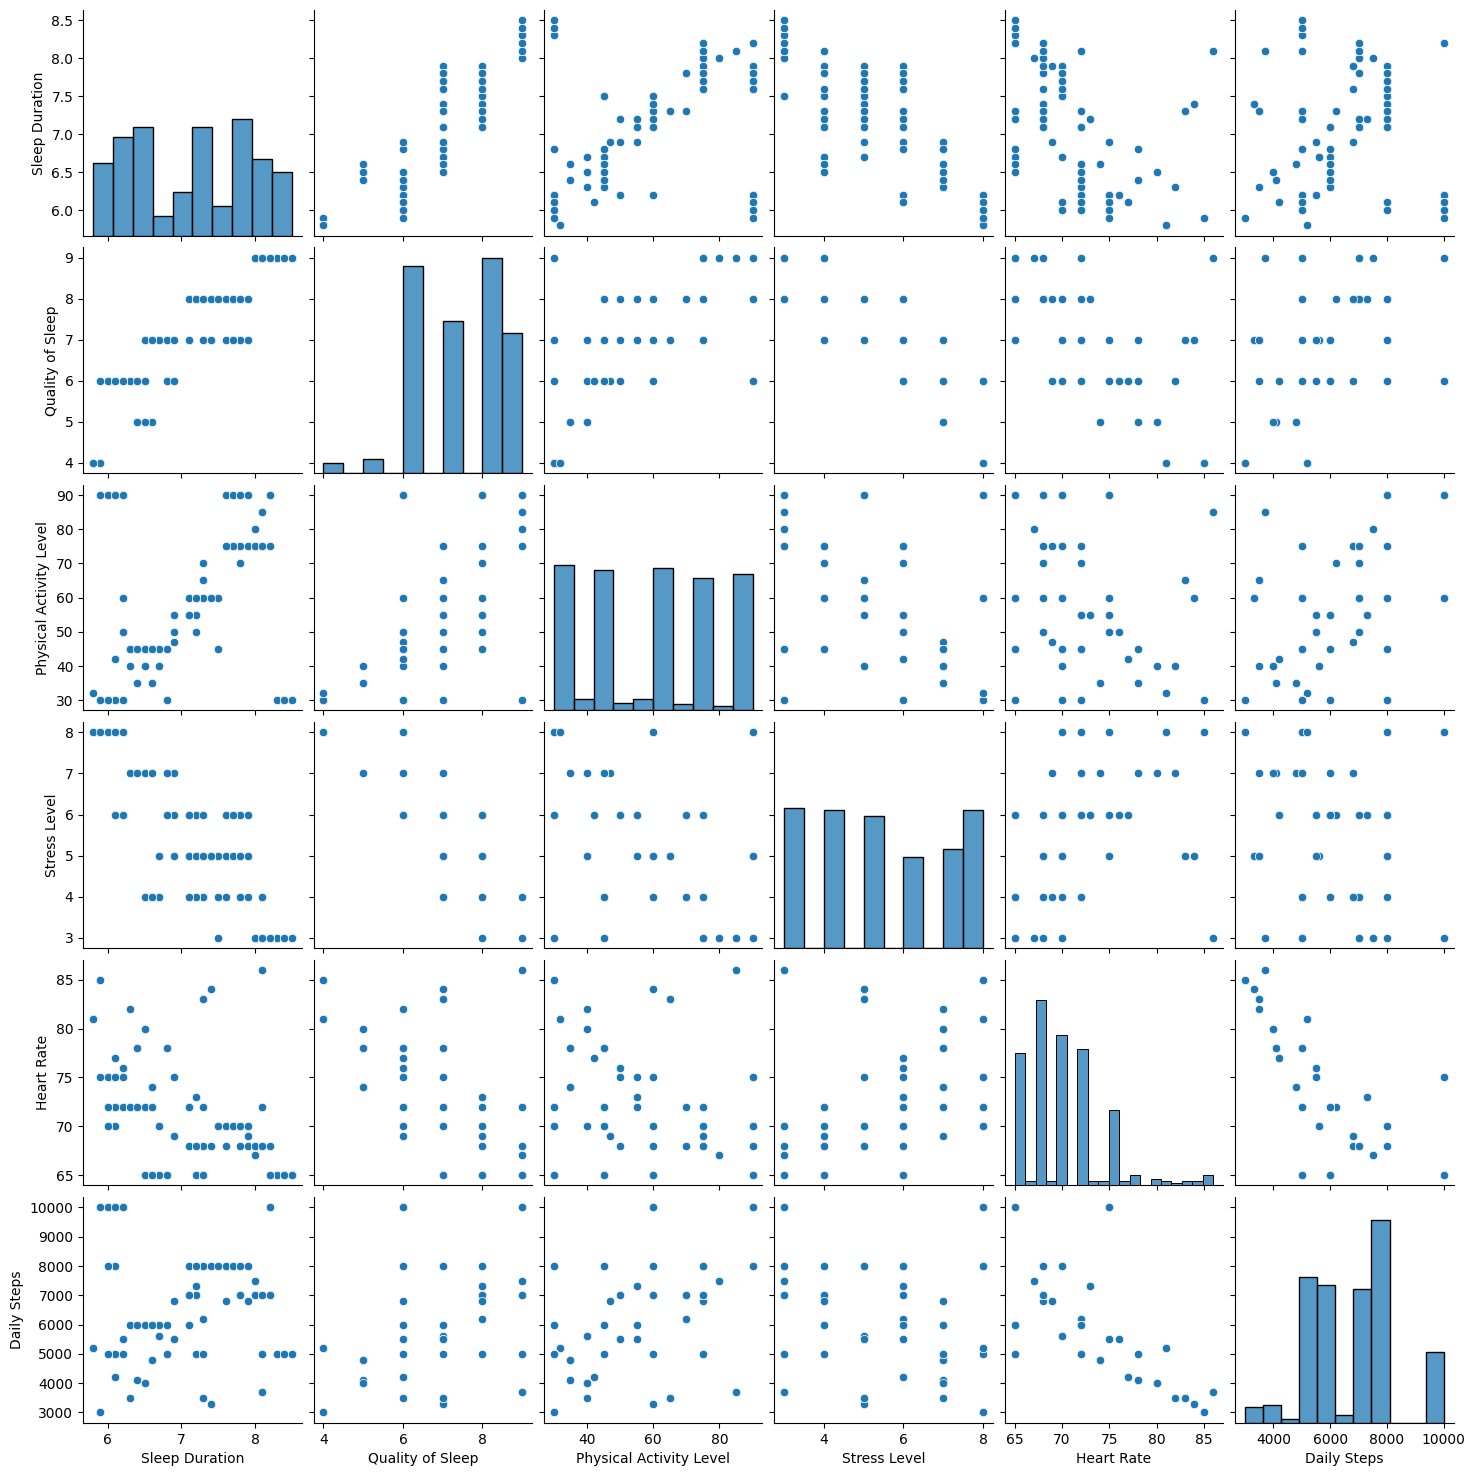

In [ ]:
df2= df[['Sleep Duration','Quality of Sleep', 'Physical Activity Level','Stress Level','Heart Rate','Daily Steps']]
sns.pairplot(df2)

<img src="image-20231213-203550.png" width="" align="" />

## Modeling

### Single-variable(1D) LinearRegression

Let's see if **Sleep Duration** correlates with **Stress Level**.
- Using Altair, make a scatter plot with “Sleep Duration” on the x-axis and with “Stress Level” on the y-axis.

In [ ]:
c1 = alt.Chart(df).mark_circle().encode(
    x=alt.X("Stress Level", scale=alt.Scale(zero=False)),
    y=alt.Y("Sleep Duration", scale=alt.Scale(zero=False))
)

c1


alt.Chart(...)

An downward trend can be seen in the graph. Let's try fitting a linear regression.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["Stress Level"]], df["Sleep Duration"], test_size=0.2, random_state=42)
reg1 = LinearRegression()
reg1.fit(X_train,y_train)

LinearRegression()

Here are the coefficients and intercepts:

In [ ]:
reg1.intercept_

9.053225447629982

In [ ]:
reg1.coef_[0]

-0.3571879148875095

There appears to be a negative correlation between "Stress Level" and "Sleep Duration".

Here is a line graph of the fitted line.

In [ ]:
df["y_pred_linear"] = reg1.predict(df[["Stress Level"]])

In [ ]:
c2 = alt.Chart(df).mark_line(color="red").encode(
    x=alt.X("Stress Level", scale=alt.Scale(zero=False)),
    y=alt.Y("y_pred_linear", scale=alt.Scale(zero=False))
).properties(
    title="Sleep Duration VS Stress Level (1D)"
)

c1+c2

alt.LayerChart(...)

The resulting coefficients and the generated visualization show that "Stress Level" and "Sleep Duration" are **negatively correlated**. That is, as the stress level increases, the duration of sleep decreases.

Check accuracy

In [ ]:
reg1.score(X_train,y_train)

0.6416287259643453

In [ ]:
reg1.score(X_test,y_test)

0.7106694132038407

The score for training data and testing data are similar. Thus, the problem of overfitting does not exist.

### Polynominal Regression

Here, we try to use an extension of linear regression: the Polynominal Regression. Because it can usually capture complex relationships more accurately and improves prediction accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["Stress Level"]], df["Sleep Duration"], test_size=0.2, random_state=42)

pipe = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3, include_bias=False)),
        ('reg2', LinearRegression())
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('reg2', LinearRegression())])

Here are the coefficients and intercepts:

In [ ]:
pipe['reg2'].coef_

array([-6.10996642,  1.14379135, -0.07117077])

In [ ]:
pipe['reg2'].intercept_

18.060560122823077

Here is a line graph of the fitted line.

In [ ]:
df["y_pred_poly"] = pipe.predict(df[["Stress Level"]])

In [ ]:
c3 = alt.Chart(df).mark_line(color = "red").encode(
    x = "Stress Level",
    y = "y_pred_poly"
).properties(
    title="Sleep Duration VS Stress Level (Poly)"
)
c1+c3

alt.LayerChart(...)

By generating a visualization of the graph, we can observe that the fitting line is no longer a straight line, it becomes a zigzag line as the data changes.

Check accuracy

In [ ]:
pipe.score(X_train,y_train)

0.7321725237071466

In [ ]:
pipe.score(X_test,y_test)

0.7642135932204126

The score for training data and testing data are similar. Thus, the problem of overfitting does not exist. Also, the accuracy of the prediction is improved over the previous results using the Single-variable(1D) LinearRegression method.

### Multi-variable LinearRegression

Now, we perform Multi-variable LinearRegression. Instead of a single input variable, we use three: `"Quality of Sleep", "Physical Activity Level", "Stress Level"`. This model typically has higher predictive accuracy when multiple influential factors are included.

In [ ]:
cols = ["Quality of Sleep","Physical Activity Level","Stress Level"]
X_train, X_test, y_train, y_test = train_test_split(df[cols], df["Sleep Duration"], test_size=0.2, random_state=42)
reg3 = LinearRegression()
reg3.fit(X_train,y_train)

LinearRegression()

Here are the coefficients and intercepts:

In [ ]:
reg3.coef_

array([ 0.52995689,  0.00194484, -0.04022593])

In [ ]:
reg3.coef_[0]

0.5299568895665259

Here is a line graph of the fitted line.

In [ ]:
df["y_pred_logistic"] = reg3.predict(df[cols])

In [ ]:
c4 = alt.Chart(df).mark_line(color="red").encode(
    x=alt.X("Stress Level", scale=alt.Scale(zero=False)),
    y=alt.Y("y_pred_linear", scale=alt.Scale(zero=False))
).properties(
    title="Sleep Duration VS Stress Level (Logistics)"
)

c1+c4

alt.LayerChart(...)

Check accuracy

In [ ]:
reg3.score(X_train,y_train)

0.7844910687954103

In [ ]:
reg3.score(X_test,y_test)

0.7809667489067984

The score for training data and testing data are similar. Thus, the problem of overfitting does not exist. And, compared to Single-variable (1D) LinearRegression and Polynominal Regression, the prediction accuracy of this model is further improved.

## Summary

We built three models to predict `"Sleep Duration"`: Single-variable(1D) LinearRegression, Polynominal Regression, Multi-variable The accuracy of the three models is 0.71, 0.76 and 0.78 respectively. Moreover, we can conclude that **"Stress Level"** and **"Sleep Duration"** are **negatively correlated**.

# Q2: Prediction of Sleep Disorder

**Details about Sleep Disorder Column:**
- `None`: The individual does not exhibit any specific sleep disorder.
- `Insomnia`: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- `Sleep Apnea`: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

## Decision Tree

Train a model using the DecisionTreeClassifier to predict the category of sleep disorder based on an individual's body mass index (BMI) category and occupation.

In [ ]:
cols = ['BMI Category_cat','Occupation_cat']
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['Sleep Disorder'], test_size=0.4, random_state=42)
clf1 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

Visualize decision trees to help understand how the model makes decisions.

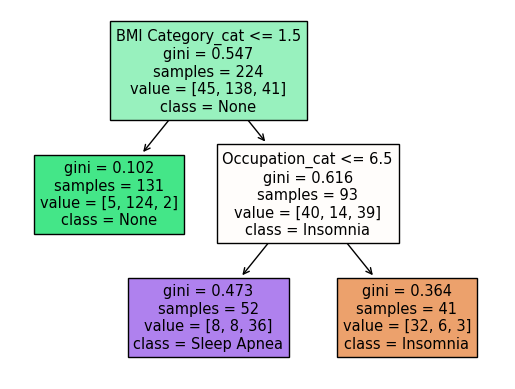

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf1, 
                   feature_names=clf1.feature_names_in_,
                   class_names=clf1.classes_,
                   filled=True)

Check accuracy

In [ ]:
clf1.score(X_train,y_train)

0.8571428571428571

In [ ]:
clf1.score(X_test,y_test)

0.8666666666666667

The score for training data and testing data are similar. Thus, the problem of overfitting does not exist.

### The decision boundary for our decision tree

Here we use random number generator to generate (5000) random points for our chart

In [ ]:
rng = np.random.default_rng()
arr = rng.random(size = (5000,2))

df3 = pd.DataFrame(arr, columns=cols)
df3['BMI Category_cat'] *= 3
df3['Occupation_cat'] *= 10


df3['pred'] = clf1.predict(df3[cols])

Now we make the chart. This shows a decision tree with three leaf nodes (three regions). 

In [ ]:
alt.Chart(df3).mark_circle().encode(
    x = 'BMI Category_cat',
    y = 'Occupation_cat',
    color = 'pred'
)

alt.Chart(...)

## Ramdom Forest

In order to improve the accuracy of the prediction, we attempt to use Random Forest. By constructing multiple decision trees and averaging their predictions.

First, we add two corresponding variables: 'Age', 'Stress Level'.

In [ ]:
cols = ['Age','Stress Level','BMI Category_cat','Occupation_cat']
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['Sleep Disorder'], test_size=0.4, random_state=42)
rfc1 = RandomForestClassifier(n_estimators=200, max_leaf_nodes=5)
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=5, n_estimators=200)

Check which features are more important for prediction

In [ ]:
pd.Series(rfc1.feature_importances_, index=rfc1.feature_names_in_).sort_values(ascending=False)

BMI Category_cat    0.366654
Occupation_cat      0.317599
Age                 0.245178
Stress Level        0.070569
dtype: float64

Check accuracy

In [ ]:
rfc1.score(X_train,y_train)

0.9107142857142857

In [ ]:
rfc1.score(X_test,y_test)

0.8733333333333333

The results obtained are similar to the Decision Tree model, slightly better.

## Summary

Since "Sleep Disorder" is Categorical, we built two models, Decision Tree and Ramdom Forest, to predict it. Compared with Decision Tree, we added two corresponding variables in Ramdom Forest. But the accuracy difference between these two models is quite small. Their accuracy is 0.86 and 0.87 respectively.

# Summary

This project analyzed the influence of daily habits and lifestyles on sleep status, particularly sleep duration and sleep disorders, through multiple models. The accuracy of the models demonstrated the strong association between these factors and sleep quality. We found a negative correlation between stress levels and sleep duration. Furthermore, although the accuracy of the decision tree and random forest models was similar in predicting sleep disorders, this demonstrates the potential value of different modeling approaches in solving real-world problems.

# References

This dataset [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data) was obtained from Kaggle. 